# __Adam Optimizer__
- Adam is an optimization algorithm that combines the benefits of AdaGrad and RMSProp.
- It adapts the learning rates based on both the average first moment (mean) and the average second moment (uncentered variance) of the gradients.
- It uses exponential moving averages of the gradients and squared gradients, controlled by parameters beta1 and beta2, to update the model parameters effectively.

## Steps to Be Followed:
1. Importing the required libraries
2. Defining the objective function
3. Implementing Adam algorithm
4. Plotting the objective function
5. Optimizing the Adam

### Step 1: Importing the Required Libraries

- Import NumPy packages
- Import the Python package matplotlib, which sets the padding between and around the subplots as well as the figure size
- Import all other necessary libraries

In [1]:
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot

### Step 2: Defining the Objective Function
- The objective function is a mathematical function that takes two variables, x and y, as inputs.
- It returns the sum of the squares of x and y, representing a measure of the quality or fitness of a particular solution in an optimization problem.

In [2]:
def objective (x,y) :
    return x** 2.0 + y**2.0

### How Does Adam Algorithm Work?
- Select a random point in the bounds of the problem as a starting point for the search
- Generate an initial point
  - x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
  - score = objective(x[0], x[1])
- Initialize first and second moments
  - m = [0.0 for _ in range(bounds.shape[0])]
  - v = [0.0 for _ in range(bounds.shape[0])]
- Run  fixed number of iterations of gradient descent
- Calculate gradient
   - gradient = derivative(solution[0], solution[1])
- Calculate gradient g(t)
- Derivative of the current set of parameters
   - g(t) = derivative(x[0], x[1])
- First moment
  - m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
  - m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
- Second moment
   - v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
   - v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
- Bias correction
  - mhat(t) = m(t) / (1 - beta1(t))
  - mhat = m[i] / (1.0 - beta1**(t+1))
  - vhat(t) = v(t) / (1 - beta2(t))
  - vhat = v[i] / (1.0 - beta2**(t+1))
- The updated variable
  - x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
  - x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
- This is repeated for each parameter that is being optimized.


### Step 3: Implementing Adam Algorithm
 - The code defines a gradient descent algorithm with the Adam optimization method.
 - It takes an objective function, derivative function, bounds of the variables, number of iterations, learning rate (alpha), and Adam parameters (beta1 and beta2) as inputs.
 - The algorithm iteratively updates the solution by calculating gradients, updating first and second moments, and adjusting the solution using the Adam update equation.
 - The progress is reported at each iteration, and the final solution along with its corresponding score is returned.
 - This code implements gradient descent with Adam optimization for finding the best solution to the provided objective function within the given bounds.

In [3]:
def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])

def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):

    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])

    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]

    for t in range(n_iter):

        g = derivative(x[0], x[1])

        for i in range(x.shape[0]):

            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
            mhat = m[i] / (1.0 - beta1**(t+1))
            vhat = v[i] / (1.0 - beta2**(t+1))
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
        score = objective(x[0], x[1])
        print('>%d f(%s) = %.5f' % (t, x, score))
    return [x, score]

### Step 4: Plotting the Objective Function

- The code defines the range of input values using the "bounds" array and creates two arrays, "x-axis" and "y-axis," with uniformly spaced values at 0.1 increments within the defined range.
- It then generates a mesh grid of coordinates using the "x-axis" and "y-axis" arrays, computes the objective function values for each coordinate, and creates a filled contour plot with 50 levels using the "contour" function in Matplotlib with the jet color scheme.

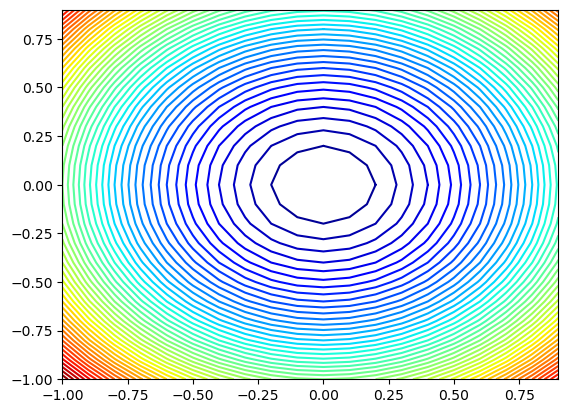

In [4]:
bounds = asarray([[-1.0, 1.0],[-1.0, 1.0]])

xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)

x, y = meshgrid (xaxis, yaxis)

results = objective(x,y)

pyplot.contour(x, y, results, levels = 50,cmap = 'jet')

pyplot.show()

**Observation:**
- The code generates a contour plot of the objective function using the given input range.
- The contour plot provides a visual representation of the function's values and their variations across the input space.

Note: The initial value of the moving averages and beta1 and beta2 values close to 1.0 (recommended) result in a bias of moment estimates toward zero.
This bias is overcome by first calculating the biased estimate before calculating the bias-corrected estimates.

## Step 5: Optimizing the Adam
- Set the random seed to ensure reproducibility
- Define the bounds for the input variables
- Specify the number of iterations
- Set the value of alpha, beta1, and beta2 for the Adam algorithm
- Apply the Adam algorithm to find the best solution and its corresponding score
- Print messages indicating the completion of the optimization process




In [5]:
seed(1)
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
n_iter = 60
alpha = 0.02
beta1 = 0.8
beta2 = 0.999

best, score = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.14595599  0.42064899]) = 0.19825
>1 f([-0.12613855  0.40070573]) = 0.17648
>2 f([-0.10665938  0.3808601 ]) = 0.15643
>3 f([-0.08770234  0.3611548 ]) = 0.13812
>4 f([-0.06947941  0.34163405]) = 0.12154
>5 f([-0.05222756  0.32234308]) = 0.10663
>6 f([-0.03620086  0.30332769]) = 0.09332
>7 f([-0.02165679  0.28463383]) = 0.08149
>8 f([-0.00883663  0.26630707]) = 0.07100
>9 f([0.00205801 0.24839209]) = 0.06170
>10 f([0.01088844 0.23093228]) = 0.05345
>11 f([0.01759677 0.2139692 ]) = 0.04609
>12 f([0.02221425 0.19754214]) = 0.03952
>13 f([0.02485859 0.18168769]) = 0.03363
>14 f([0.02572196 0.16643933]) = 0.02836
>15 f([0.02505339 0.15182705]) = 0.02368
>16 f([0.02313917 0.13787701]) = 0.01955
>17 f([0.02028406 0.12461125]) = 0.01594
>18 f([0.01679451 0.11204744]) = 0.01284
>19 f([0.01296436 0.10019867]) = 0.01021
>20 f([0.00906264 0.08907337]) = 0.00802
>21 f([0.00532366 0.07867522]) = 0.00622
>22 f([0.00193919 0.06900318]) = 0.00477
>23 f([-0.00094677  0.06005154]) = 0.00361
>24 f(

**Observation:**
- The observation is that the optimization process using the Adam algorithm successfully converges to a minimal value of the objective function, reaching an optimal solution within the specified bounds.